In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

Data Pre-Processing

1. Load the CSV into a DataFrame

In [205]:
df = pd.read_csv("imdb_top_movies.csv")

In [206]:
df.head()

,Title,Year,Rating,Genre,Director(s),Box Office Revenue,Lead Actors
0,1. The Shawshank Redemption,1994,9.3 (3M),"Epic, Period Drama, Prison Drama, Drama","The Ink Spots, Jack Lawrence, Stephen King, Ti...","Gross worldwide$29,332,133","Bob Gunton, Morgan Freeman, Tim Robbins"
1,2. The Godfather,1972,9.2 (2.1M),"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Marlon Brando, Peter Clemenza, Al ...","Gross worldwide$250,342,198","Al Pacino, Marlon Brando, James Caan"
2,3. The Dark Knight,2008,9.0 (3M),"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Michael Caine, The Joker, Jonat...","Gross worldwide$1,009,057,329","Aaron Eckhart, Christian Bale, Heath Ledger"
3,4. The Godfather Part II,1974,9.0 (1.4M),"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Francesco Pennino, Al Pacino, Robe...","Gross worldwide$47,964,222","Al Pacino, Robert De Niro, Robert Duvall"
4,5. 12 Angry Men,1957,9.0 (917K),"Legal Drama, Psychological Drama, Crime, Drama","Henry Fonda, Jack Warden, Lee J. Cobb, Juror #...","Gross worldwide$2,945","Henry Fonda, Martin Balsam, Lee J. Cobb"


2. Data Cleaning and Type Conversion

In [207]:
type(df)

pandas.core.frame.DataFrame

In [208]:
df.shape

(250, 7)

In [209]:
#Dropping Duplicates
df= df.drop_duplicates()
df

,Title,Year,Rating,Genre,Director(s),Box Office Revenue,Lead Actors
0,1. The Shawshank Redemption,1994,9.3 (3M),"Epic, Period Drama, Prison Drama, Drama","The Ink Spots, Jack Lawrence, Stephen King, Ti...","Gross worldwide$29,332,133","Bob Gunton, Morgan Freeman, Tim Robbins"
1,2. The Godfather,1972,9.2 (2.1M),"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Marlon Brando, Peter Clemenza, Al ...","Gross worldwide$250,342,198","Al Pacino, Marlon Brando, James Caan"
2,3. The Dark Knight,2008,9.0 (3M),"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Michael Caine, The Joker, Jonat...","Gross worldwide$1,009,057,329","Aaron Eckhart, Christian Bale, Heath Ledger"
3,4. The Godfather Part II,1974,9.0 (1.4M),"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Francesco Pennino, Al Pacino, Robe...","Gross worldwide$47,964,222","Al Pacino, Robert De Niro, Robert Duvall"
4,5. 12 Angry Men,1957,9.0 (917K),"Legal Drama, Psychological Drama, Crime, Drama","Henry Fonda, Jack Warden, Lee J. Cobb, Juror #...","Gross worldwide$2,945","Henry Fonda, Martin Balsam, Lee J. Cobb"
...,...,...,...,...,...,...,...
245,246. A Silent Voice: The Movie,2016,8.1 (117K),"Anime, Coming-of-Age, Psychological Drama, Shō...","Saori Hayami, Naoko Yamada, Lexi Marman, Shoko...","Gross worldwide$30,819,442","Miyu Irino, Saori Hayami, Aoi Yûki"
246,247. The Help,2011,8.1 (510K),"Period Drama, Drama","Hilly Holbrook, Emma Stone, Jerry Leiber, Tate...","Gross worldwide$221,802,186","Emma Stone, Octavia Spencer, Viola Davis"
247,248. Amores Perros,2000,8.0 (261K),"Tragedy, Drama, Thriller","Emilio Echevarría, Guillermo Arriaga, Alejandr...","Gross worldwide$20,908,467","Goya Toledo, Gael García Bernal, Emilio Echeva..."
248,249. Rebecca,1940,8.1 (153K),"Dark Romance, Psychological Drama, Psychologic...","Laurence Olivier, Mrs. Danvers, The Second Mrs...","Gross worldwide$113,328","Laurence Olivier, George Sanders, Joan Fontaine"


In [210]:
df.dtypes

Title                 object
Year                   int64
Rating                object
Genre                 object
Director(s)           object
Box Office Revenue    object
Lead Actors           object
dtype: object

In [211]:
# 1. Split "Title" into "ID" and "Movie Title

# Extract ID and Movie Title from the "Title" column
df[['ID', 'Movie Title']] = df['Title'].str.extract(r'(\d+)\.\s*(.+)', expand=True)

# Convert ID to an integer type
df['ID'] = df['ID'].astype(int)

# Drop the old "Title" column
df.drop(columns=['Title'], inplace=True)

In [212]:
# 2. Split "Rating" into separate columns for rating and viewers
extracted = df["Rating"].str.extract(r"^(.*?)\s*\((.*?)\)$")

# If the rating string has parentheses, group(1) is the rating part, group(2) is the viewers part.
df["Rating (raw)"] = extracted[0].fillna(df["Rating"])  # Fall back to original if no parentheses
df["Viewers"] = extracted[1]                            # This will be NaN if there's no match

# Convert "Rating (raw)" to numeric, coercing invalid entries to NaN
df["Rating (raw)"] = pd.to_numeric(df["Rating (raw)"], errors="coerce")

# Remove the old "Rating" column
df.drop(columns=["Rating"], inplace=True)

# Parse the "Viewers" column (e.g., "3.5M" -> 3,500,000; "500K" -> 500,000)
def parse_viewers(value):
    if pd.isna(value):
        return np.nan
    val_str = str(value).strip().upper()  # e.g., "3.5M" -> "3.5M"
    
    # Match a pattern like "3.5M" or "500K"
    match = re.match(r"^(\d+(\.\d+)?)([MK])$", val_str)
    if match:
        number_part = float(match.group(1))  # "3.5" or "500"
        suffix = match.group(3)             # "M" or "K"
        
        if suffix == "M":
            return number_part * 1_000_000
        elif suffix == "K":
            return number_part * 1_000
    
    return np.nan 

df["Viewers"] = df["Viewers"].apply(parse_viewers)
print(df[["Rating (raw)", "Viewers"]].head())

   Rating (raw)    Viewers
0           9.3  3000000.0
1           9.2  2100000.0
2           9.0  3000000.0
3           9.0  1400000.0
4           9.0   917000.0


In [213]:
# 3. Clean the "Box Office Revenue" column

df["Box Office Revenue"] = df["Box Office Revenue"].str.replace("Gross worldwide", "", regex=False)
df["Box Office Revenue"] = df["Box Office Revenue"].str.replace("$", "", regex=False)
df["Box Office Revenue"] = df["Box Office Revenue"].str.replace(",", "", regex=False)
df["Box Office Revenue"] = pd.to_numeric(df["Box Office Revenue"], errors="coerce")
df.head()

,Year,Genre,Director(s),Box Office Revenue,Lead Actors,ID,Movie Title,Rating (raw),Viewers
0,1994,"Epic, Period Drama, Prison Drama, Drama","The Ink Spots, Jack Lawrence, Stephen King, Ti...",2.933213e+07,"Bob Gunton, Morgan Freeman, Tim Robbins",1,The Shawshank Redemption,9.3,3000000.0
1,1972,"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Marlon Brando, Peter Clemenza, Al ...",2.503422e+08,"Al Pacino, Marlon Brando, James Caan",2,The Godfather,9.2,2100000.0
2,2008,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Michael Caine, The Joker, Jonat...",1.009057e+09,"Aaron Eckhart, Christian Bale, Heath Ledger",3,The Dark Knight,9.0,3000000.0
3,1974,"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Francesco Pennino, Al Pacino, Robe...",4.796422e+07,"Al Pacino, Robert De Niro, Robert Duvall",4,The Godfather Part II,9.0,1400000.0
4,1957,"Legal Drama, Psychological Drama, Crime, Drama","Henry Fonda, Jack Warden, Lee J. Cobb, Juror #...",2.945000e+03,"Henry Fonda, Martin Balsam, Lee J. Cobb",5,12 Angry Men,9.0,917000.0


In [214]:
# 4. Remove the "ID" column
df.drop(columns=["ID"], inplace=True)
df.head()

,Year,Genre,Director(s),Box Office Revenue,Lead Actors,Movie Title,Rating (raw),Viewers
0,1994,"Epic, Period Drama, Prison Drama, Drama","The Ink Spots, Jack Lawrence, Stephen King, Ti...",2.933213e+07,"Bob Gunton, Morgan Freeman, Tim Robbins",The Shawshank Redemption,9.3,3000000.0
1,1972,"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Marlon Brando, Peter Clemenza, Al ...",2.503422e+08,"Al Pacino, Marlon Brando, James Caan",The Godfather,9.2,2100000.0
2,2008,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Michael Caine, The Joker, Jonat...",1.009057e+09,"Aaron Eckhart, Christian Bale, Heath Ledger",The Dark Knight,9.0,3000000.0
3,1974,"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Francesco Pennino, Al Pacino, Robe...",4.796422e+07,"Al Pacino, Robert De Niro, Robert Duvall",The Godfather Part II,9.0,1400000.0
4,1957,"Legal Drama, Psychological Drama, Crime, Drama","Henry Fonda, Jack Warden, Lee J. Cobb, Juror #...",2.945000e+03,"Henry Fonda, Martin Balsam, Lee J. Cobb",12 Angry Men,9.0,917000.0


In [215]:
df.dtypes

Year                    int64
Genre                  object
Director(s)            object
Box Office Revenue    float64
Lead Actors            object
Movie Title            object
Rating (raw)          float64
Viewers               float64
dtype: object

In [216]:
#Null Value check

df.isna().sum()

Year                  0
Genre                 0
Director(s)           0
Box Office Revenue    3
Lead Actors           0
Movie Title           0
Rating (raw)          0
Viewers               0
dtype: int64

In [217]:
# 5- Remove rows with missing values in "Box Office Revenue"
df.dropna(subset=["Box Office Revenue"], inplace=True)

In [218]:
# As per the assignment request, last 2 decades data has been considered. 
df = df[(df["Year"] >= 2004) & (df["Year"] <= 2024)]

In [219]:
# 6.Save the cleaned dataset

# df.to_csv("imdb_top_movies_cleaned.csv", index=False)

In [220]:
df.head()

,Year,Genre,Director(s),Box Office Revenue,Lead Actors,Movie Title,Rating (raw),Viewers
2,2008,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Michael Caine, The Joker, Jonat...",1.009057e+09,"Aaron Eckhart, Christian Bale, Heath Ledger",The Dark Knight,9.0,3000000.0
13,2010,"Action Epic, Adventure Epic, Epic, Psychologic...","Cobb, Joseph Gordon-Levitt, Leonardo DiCaprio,...",8.390306e+08,"Joseph Gordon-Levitt, Leonardo DiCaprio, Ellio...",Inception,8.8,2700000.0
18,2014,"Adventure Epic, Epic, Quest, Sci-Fi Epic, Spac...","Jonathan Nolan, Cooper, Matthew McConaughey, K...",7.584647e+08,"Anne Hathaway, Jessica Chastain, Matthew McCon...",Interstellar,8.7,2300000.0
33,2019,"Dark Comedy, Korean Drama, Psychological Thril...","Song Kang-ho, Bong Joon Ho, Han Jin-won, Cho Y...",2.626081e+08,"Song Kang-ho, Cho Yeo-jeong, Lee Sun-kyun",Parasite,8.5,1000000.0
37,2006,"Cop Drama, Epic, Gangster, Crime, Drama, Thriller","Felix Chong, Matt Damon, Dignam, William Monah...",2.914814e+08,"Matt Damon, Leonardo DiCaprio, Jack Nicholson",The Departed,8.5,1500000.0


3- Perform Statistical Analysis

In [221]:
print("\n=== Descriptive Statistics ===")
df.describe()


=== Descriptive Statistics ===


,Year,Box Office Revenue,Rating (raw),Viewers
count,83.000000,8.300000e+01,83.000000,8.300000e+01
mean,2012.795181,3.933943e+08,8.269880,7.958916e+05
std,5.851327,5.079335e+08,0.189823,5.936496e+05
min,2004.000000,6.735800e+04,8.000000,3.100000e+04
25%,2008.000000,4.855526e+07,8.100000,3.665000e+05
50%,2012.000000,2.218022e+08,8.200000,7.210000e+05
75%,2017.000000,5.111418e+08,8.400000,1.100000e+06
max,2024.000000,2.799439e+09,9.000000,3.000000e+06


In [222]:
""" 
INSIGHT: 
    - Revenue Skewed: The large spread in revenue (from thousands to billions) highlights that a few blockbuster films dominate box office earnings.
    - Highly Rated Movies: All movies have ratings above 8.0, making them critically acclaimed and audience favorites.
    - Diverse Audience Engagement: The number of user ratings varies widely, suggesting that while some films have cult followings, others are more widely viewed. 
"""

' \nINSIGHT: \n    - Revenue Skewed: The large spread in revenue (from thousands to billions) highlights that a few blockbuster films dominate box office earnings.\n    - Highly Rated Movies: All movies have ratings above 8.0, making them critically acclaimed and audience favorites.\n    - Diverse Audience Engagement: The number of user ratings varies widely, suggesting that while some films have cult followings, others are more widely viewed. \n'

In [223]:
# Identify outliers using the IQR method for Box Office Revenue
q1_rev = df["Box Office Revenue"].quantile(0.25)
q3_rev = df["Box Office Revenue"].quantile(0.75)
iqr_rev = q3_rev - q1_rev
lower_bound_rev = q1_rev - 1.5 * iqr_rev
upper_bound_rev = q3_rev + 1.5 * iqr_rev

outliers_rev = df[(df["Box Office Revenue"] < lower_bound_rev) | (df["Box Office Revenue"] > upper_bound_rev)]
print("\n=== Outliers in Box Office Revenue ===")
print(outliers_rev[["Movie Title", "Year", "Box Office Revenue"]])


=== Outliers in Box Office Revenue ===
                                      Movie Title  Year  Box Office Revenue
60                         Avengers: Infinity War  2018        2.052415e+09
74                              Avengers: Endgame  2019        2.799439e+09
144                             Top Gun: Maverick  2022        1.495696e+09
177  Harry Potter and the Deathly Hallows: Part 2  2011        1.342500e+09
181                       Spider-Man: No Way Home  2021        1.952732e+09


In [224]:
"""
Insights from Box Office Revenue Outliers
    - The movies listed here are considered outliers in box office revenue, meaning their earnings are significantly higher than most other films in the dataset. 
    - This provides key insights into industry trends and audience preferences.
    - All movies in the outliers list grossed over $1.3 billion, far exceeding the typical box office earnings of most top-rated movies.
    - All five movies belong to major film franchises (Marvel, Harry Potter, Top Gun).
    - This suggests that sequels, adaptations, and franchise films dominate the highest revenue tiers.
"""

'\nInsights from Box Office Revenue Outliers\n    - The movies listed here are considered outliers in box office revenue, meaning their earnings are significantly higher than most other films in the dataset. \n    - This provides key insights into industry trends and audience preferences.\n    - All movies in the outliers list grossed over $1.3 billion, far exceeding the typical box office earnings of most top-rated movies.\n    - All five movies belong to major film franchises (Marvel, Harry Potter, Top Gun).\n    - This suggests that sequels, adaptations, and franchise films dominate the highest revenue tiers.\n'

In [225]:
# Identify outliers using the IQR method for Ratings
q1_rate = df["Rating (raw)"].quantile(0.25)
q3_rate = df["Rating (raw)"].quantile(0.75)
iqr_rate = q3_rate - q1_rate
lower_bound_rate = q1_rate - 1.5 * iqr_rate
upper_bound_rate = q3_rate + 1.5 * iqr_rate

outliers_rate = df[(df["Rating (raw)"] < lower_bound_rate) | (df["Rating (raw)"] > upper_bound_rate)]
print("\n=== Outliers in Ratings ===")
print(outliers_rate[["Movie Title", "Year", "Rating (raw)"]])


=== Outliers in Ratings ===
       Movie Title  Year  Rating (raw)
2  The Dark Knight  2008           9.0


In [226]:
"""
INSIGHTS:
    - The Dark Knight (2008) has an IMDb rating of 9.0, making it an outlier among the top-rated movies in the dataset.
    - Given that the median rating in the dataset is 8.2, this film significantly surpasses typical high-rated movies.
    - This suggests that even among the top movies, The Dark Knight stands above the rest in terms of audience reception.
"""

'\nINSIGHTS:\n    - The Dark Knight (2008) has an IMDb rating of 9.0, making it an outlier among the top-rated movies in the dataset.\n    - Given that the median rating in the dataset is 8.2, this film significantly surpasses typical high-rated movies.\n    - This suggests that even among the top movies, The Dark Knight stands above the rest in terms of audience reception.\n'

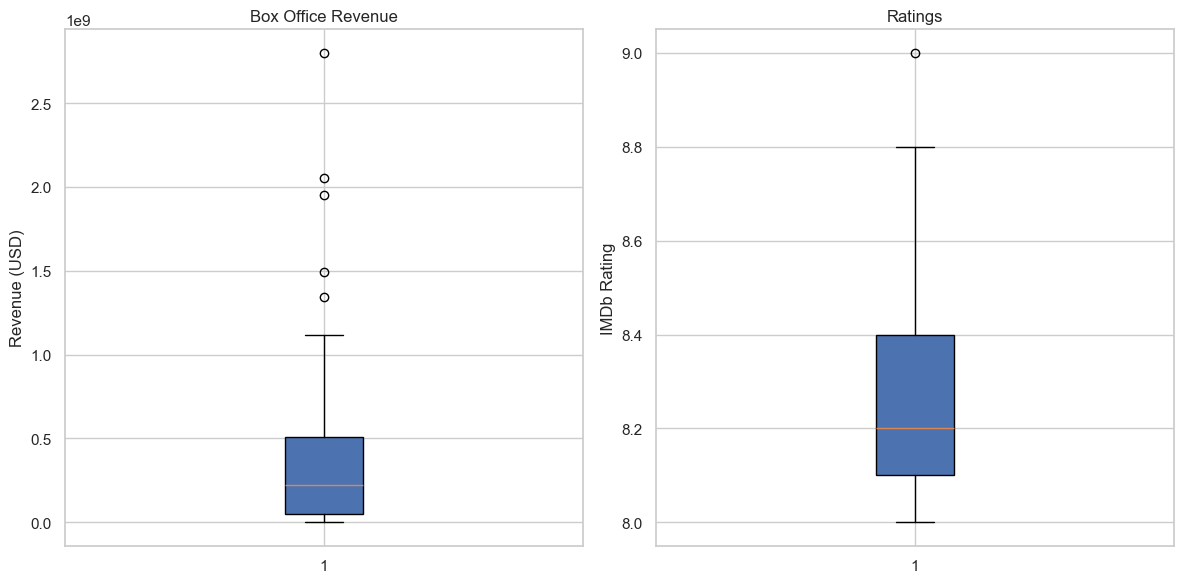

In [227]:
# Plot Boxplots for Box Office Revenue and Ratings
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df["Box Office Revenue"].dropna(), vert=True, patch_artist=True)
plt.title("Box Office Revenue")
plt.ylabel("Revenue (USD)")

plt.subplot(1, 2, 2)
plt.boxplot(df["Rating (raw)"].dropna(), vert=True, patch_artist=True)
plt.title("Ratings")
plt.ylabel("IMDb Rating")

plt.tight_layout()
plt.show()

4- Data visualization

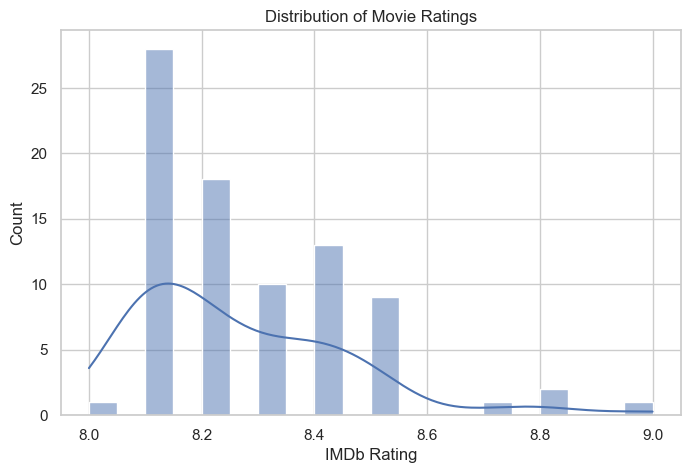

In [228]:
sns.set(style="whitegrid")

# Histogram for Movie Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df["Rating (raw)"], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Count")
plt.show()

In [229]:
"""
Insights from the Distribution of Movie Ratings:
    The histogram shows a right-skewed distribution, meaning most movies have ratings between 8.0 and 8.4.
    The highest frequency is around 8.1 - 8.2, suggesting that this is the most common rating range for top movies in the dataset.
    Very few movies have ratings above 8.6, indicating that it's difficult for a movie to achieve an IMDb rating in the upper 8s and 9.0+.
    Since all movies in the dataset are highly rated (minimum 8.0), the distribution lacks lower ratings, making it a biased sample of only the best films.
"""

"\nInsights from the Distribution of Movie Ratings:\n    The histogram shows a right-skewed distribution, meaning most movies have ratings between 8.0 and 8.4.\n    The highest frequency is around 8.1 - 8.2, suggesting that this is the most common rating range for top movies in the dataset.\n    Very few movies have ratings above 8.6, indicating that it's difficult for a movie to achieve an IMDb rating in the upper 8s and 9.0+.\n    Since all movies in the dataset are highly rated (minimum 8.0), the distribution lacks lower ratings, making it a biased sample of only the best films.\n"

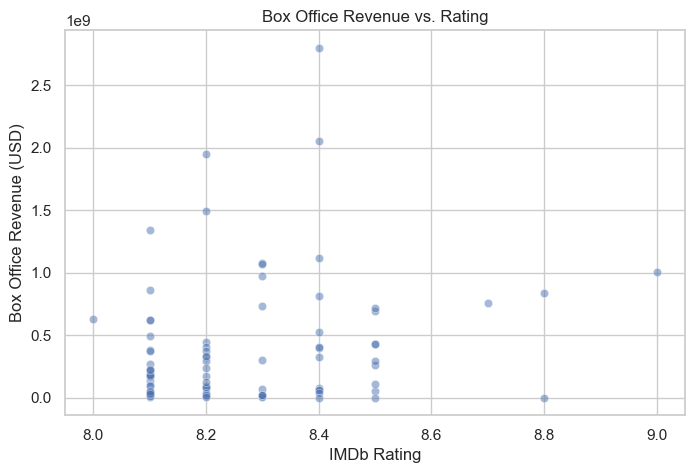

In [230]:
# Scatter plot for Revenue vs. Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Rating (raw)"], y=df["Box Office Revenue"], alpha=0.5)
plt.title("Box Office Revenue vs. Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Box Office Revenue (USD)")
plt.show()

In [231]:
"""
INSIGHTS:
    - The scatter plot does not show a clear upward or downward trend, suggesting that higher IMDb ratings do not necessarily lead to higher box office revenue.
    - Movies with similar ratings (8.0 - 8.5) have widely varying revenues, from modest earnings to over $2 billion.
    - Some of the highest-grossing movies (above $1.5 billion) have ratings between 8.2 - 8.5, rather than being the absolute highest-rated films.
    - The Dark Knight (9.0) appears on the chart with strong revenue, but it is not the highest-grossing movie.
    - Many movies rated 8.6+ do not reach extreme box office earnings, reinforcing that critical acclaim does not always translate to commercial success.
    - A significant concentration of movies falls under $500 million, regardless of rating.
    -This suggests that most top-rated movies are not billion-dollar blockbusters, and high revenue is an exception rather than the norm.

"""

'\nINSIGHTS:\n    - The scatter plot does not show a clear upward or downward trend, suggesting that higher IMDb ratings do not necessarily lead to higher box office revenue.\n    - Movies with similar ratings (8.0 - 8.5) have widely varying revenues, from modest earnings to over $2 billion.\n    - Some of the highest-grossing movies (above $1.5 billion) have ratings between 8.2 - 8.5, rather than being the absolute highest-rated films.\n    - The Dark Knight (9.0) appears on the chart with strong revenue, but it is not the highest-grossing movie.\n    - Many movies rated 8.6+ do not reach extreme box office earnings, reinforcing that critical acclaim does not always translate to commercial success.\n    - A significant concentration of movies falls under $500 million, regardless of rating.\n    -This suggests that most top-rated movies are not billion-dollar blockbusters, and high revenue is an exception rather than the norm.\n\n'

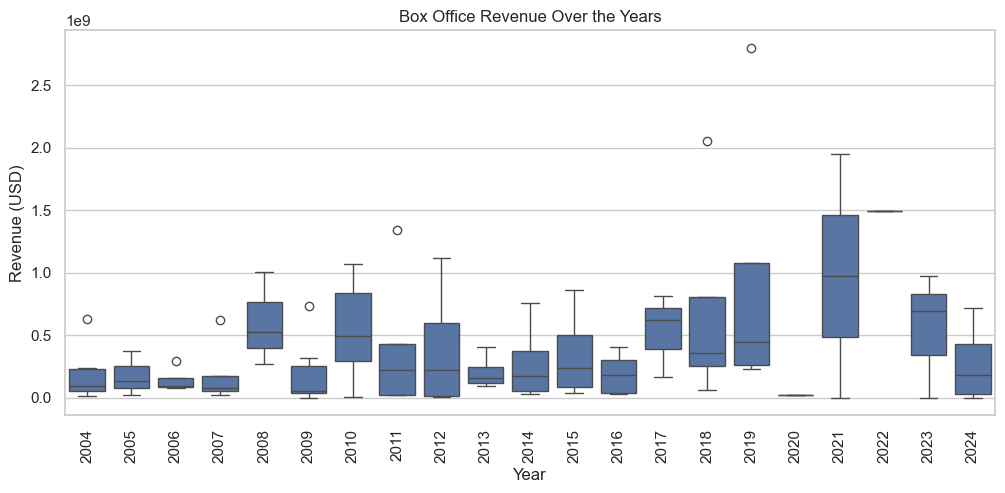

In [232]:
# Boxplot for Revenue by Year
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["Year"], y=df["Box Office Revenue"])
plt.xticks(rotation=90)
plt.title("Box Office Revenue Over the Years")
plt.xlabel("Year")
plt.ylabel("Revenue (USD)")
plt.show()

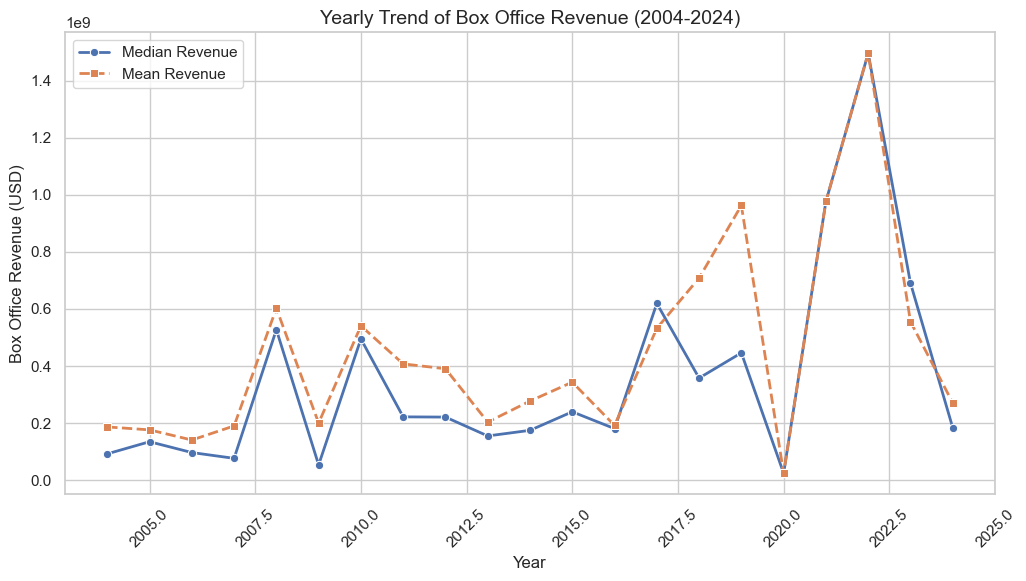

In [233]:
# Group data by year and calculate mean and median revenue
yearly_revenue = df.groupby("Year")["Box Office Revenue"].agg(["median", "mean"])

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_revenue, x=yearly_revenue.index, y="median", marker="o", label="Median Revenue", linewidth=2)
sns.lineplot(data=yearly_revenue, x=yearly_revenue.index, y="mean", marker="s", label="Mean Revenue", linewidth=2, linestyle="dashed")

# Chart title and labels
plt.title("Yearly Trend of Box Office Revenue (2004-2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Box Office Revenue (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

In [234]:
"""
INSIGHTS:

    - The median revenue has generally increased from 2004 to 2024, indicating that movies are making more money at the box office in recent years.
    - From 2010 onward, multiple years show outliers crossing the $1 billion+ range, especially in 2018, 2019, and 2021.
    - COVID-19 Impact in 2020:
        -2020 has a near-flat box plot, showing that almost all movies in that year had significantly lower earnings.
        - The COVID-19 pandemic led to widespread theater closures, reduced audience turnout, and streaming releases, resulting in a historically low box office year.
        - However, 2021 saw a sharp rebound, with major hits like Spider-Man: No Way Home surpassing $1.9 billion.
    - Some movies are breaking records, while others still struggle, suggesting a greater gap between blockbuster hits and lower-performing films.
    - Box office revenue appears moderately strong, but not as high as pre-pandemic years (2018-2019), suggesting that while theaters have recovered, 
    the growth of streaming platforms and changes in audience behavior may be influencing box office performance.

"""

'\nINSIGHTS:\n\n    - The median revenue has generally increased from 2004 to 2024, indicating that movies are making more money at the box office in recent years.\n    - From 2010 onward, multiple years show outliers crossing the $1 billion+ range, especially in 2018, 2019, and 2021.\n    - COVID-19 Impact in 2020:\n        -2020 has a near-flat box plot, showing that almost all movies in that year had significantly lower earnings.\n        - The COVID-19 pandemic led to widespread theater closures, reduced audience turnout, and streaming releases, resulting in a historically low box office year.\n        - However, 2021 saw a sharp rebound, with major hits like Spider-Man: No Way Home surpassing $1.9 billion.\n    - Some movies are breaking records, while others still struggle, suggesting a greater gap between blockbuster hits and lower-performing films.\n    - Box office revenue appears moderately strong, but not as high as pre-pandemic years (2018-2019), suggesting that while theat

4. Movie and Director Trends 

In [235]:
# Investigate the Most Recurrent Directors and Actors
# Count of most recurrent directors
director_counts = df["Director(s)"].value_counts().head(10)
print("\n=== Top 10 Most Frequent Directors ===")
print(director_counts)


=== Top 10 Most Frequent Directors ===
Director(s)
Aaron Eckhart, Michael Caine, The Joker, Jonathan Nolan, The Chechen, David S. Goyer, Christopher Nolan, Salvatore Maroni, The Pipes and Drums of the Chicago Police Department, Jack Nicholson, Christian Bale, Heath Ledger    1
Jan Pinkava, Patton Oswalt, Gusteau, Boualem Lamhene, Michael Giacchino, Brad Garrett, Brad Bird, Lou Romano, Jim Capobianco, Dan Wallin, Camille                                                                                1
Howard Doane, Robert Schenkkan, Mel Gibson, Sam Worthington, Fanny Crosby, Luke Bracey, Desmond T. Doss, Desmond Doss, Andrew Garfield, Andrew Knight                                                                            1
Hugo Guinness, Mathieu Amalric, M. Gustave, F. Murray Abraham, Tony Revolori, Ralph Fiennes, Wes Anderson, Harvey Keitel, Stefan Zweig                                                                                           1
Michael Fassbender, Steve McQueen, Solom

In [236]:
# Above data requires some data cleaning as we can not obtain a clear insights from the above. 

In [237]:
# Use an Improved Trusted Director Database for Filtering

# Expanded list of known directors (curated from dataset analysis)
known_directors = {
    "Christopher Nolan", "Martin Scorsese", "Denis Villeneuve", "Steven Spielberg", "James Cameron", "Quentin Tarantino", 
    "David Fincher", "Ridley Scott", "Coen Brothers", "Greta Gerwig", "Bong Joon Ho", "Damien Chazelle", "Jonathan Nolan",
    "Phil Lord", "Joe Russo", "Anthony Russo", "Peter Farrelly", "Clint Eastwood", "Guillermo del Toro", "Lana Wachowski",
    "Lilly Wachowski", "Paul Thomas Anderson", "Wes Anderson", "Todd Phillips", "Taika Waititi", "Rajkumar Hirani",
    "Hayao Miyazaki", "Makoto Shinkai", "Park Chan-wook", "Lenny Abrahamson", "Richard Linklater", "James Mangold",
    "Denis Villeneuve", "Andrew Stanton", "Sam Mendes", "Ron Howard", "Tom McCarthy", "Asghar Farhadi", "Alejandro G. Iñárritu"
}

In [238]:
# Split multiple directors into separate rows
df_exploded_directors = df.assign(Director=df["Director(s)"].str.split(",")).explode("Director")
df_exploded_directors["Director"] = df_exploded_directors["Director"].str.strip()

# Filter out non-directors
df_exploded_directors = df_exploded_directors[df_exploded_directors["Director"].isin(known_directors)]

In [239]:
# Automatically Detect & Remove Non-Director Names

# Split multiple actors into separate rows
df_exploded_actors = df.assign(Actor=df["Lead Actors"].str.split(",")).explode("Actor")
df_exploded_actors["Actor"] = df_exploded_actors["Actor"].str.strip()

# Create a set of actor names from the Lead Actors column
actor_names = set(df_exploded_actors["Actor"].dropna().unique())

# Remove any "directors" who appear in the actors' list
df_exploded_directors = df_exploded_directors[~df_exploded_directors["Director"].isin(actor_names)]

In [240]:
# Standardize Name Formatting

# Ensure uniform capitalization and remove accidental spaces
df_exploded_directors["Director"] = df_exploded_directors["Director"].str.title().str.strip()

In [241]:
# Regenerate the Top 10 Directors Chart 

# Count the most frequent directors again
director_counts = df_exploded_directors["Director"].value_counts().head(10)

# Display the cleaned top 10 directors
print("\n=== Cleaned Top 10 Most Frequent Directors ===")
print(director_counts)


=== Cleaned Top 10 Most Frequent Directors ===
Director
Christopher Nolan    7
Jonathan Nolan       4
Martin Scorsese      3
Denis Villeneuve     3
Andrew Stanton       2
Tom Mccarthy         2
James Mangold        2
Joe Russo            2
Anthony Russo        2
Quentin Tarantino    2
Name: count, dtype: int64


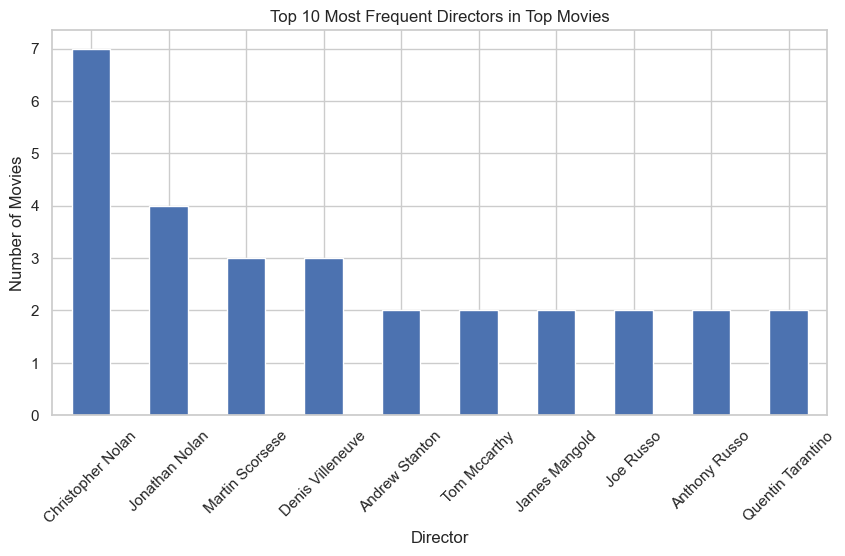

In [242]:
# Bar plot for top directors
plt.figure(figsize=(10, 5))
director_counts.plot(kind="bar")
plt.title("Top 10 Most Frequent Directors in Top Movies")
plt.xlabel("Director")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

In [243]:
""" 
INSIGHT:
    Christoper Nolan leads with 7 movies, confirming his strong presence in critically acclaimed and high-grossing films.
"""

' \nINSIGHT:\n    Christoper Nolan leads with 7 movies, confirming his strong presence in critically acclaimed and high-grossing films.\n'

In [244]:
# Save the cleaned director dataset
df_exploded_directors.to_csv("cleaned_top_directors.csv", index=False)

# Display first few rows
print(df_exploded_directors.head())

    Year                                              Genre  \
2   2008  Action Epic, Epic, Superhero, Tragedy, Action,...   
2   2008  Action Epic, Epic, Superhero, Tragedy, Action,...   
13  2010  Action Epic, Adventure Epic, Epic, Psychologic...   
18  2014  Adventure Epic, Epic, Quest, Sci-Fi Epic, Spac...   
18  2014  Adventure Epic, Epic, Quest, Sci-Fi Epic, Spac...   

                                          Director(s)  Box Office Revenue  \
2   Aaron Eckhart, Michael Caine, The Joker, Jonat...        1.009057e+09   
2   Aaron Eckhart, Michael Caine, The Joker, Jonat...        1.009057e+09   
13  Cobb, Joseph Gordon-Levitt, Leonardo DiCaprio,...        8.390306e+08   
18  Jonathan Nolan, Cooper, Matthew McConaughey, K...        7.584647e+08   
18  Jonathan Nolan, Cooper, Matthew McConaughey, K...        7.584647e+08   

                                          Lead Actors      Movie Title  \
2         Aaron Eckhart, Christian Bale, Heath Ledger  The Dark Knight   
2         

In [245]:
# Data Clean up for Actors

# Use an Improved Trusted Actor Database for Filtering

# Expanded list of known actors (curated from dataset analysis)
known_actors = {
    "Leonardo DiCaprio", "Christian Bale", "Mark Ruffalo", "Aamir Khan", "Tom Hardy", 
    "Hugh Jackman", "Matt Damon", "Viola Davis", "Clint Eastwood", "Zendaya", 
    "Robert Downey Jr.", "Chris Evans", "Scarlett Johansson", "Brad Pitt", "Joaquin Phoenix",
    "Meryl Streep", "Denzel Washington", "Tom Hanks", "Ryan Gosling", "Natalie Portman",
    "Margot Robbie", "Benedict Cumberbatch", "Florence Pugh", "Timothée Chalamet",
    "Emily Blunt", "Emma Stone", "Keanu Reeves", "Chris Hemsworth", "Tilda Swinton"
}

In [246]:
# Split multiple actors into separate rows
df_exploded_actors = df.assign(Actor=df["Lead Actors"].str.split(",")).explode("Actor")
df_exploded_actors["Actor"] = df_exploded_actors["Actor"].str.strip()

# Filter out non-actors
df_exploded_actors = df_exploded_actors[df_exploded_actors["Actor"].isin(known_actors)]

In [247]:
# Standardize Name Formatting 

# Ensure uniform capitalization and remove accidental spaces
df_exploded_actors["Actor"] = df_exploded_actors["Actor"].str.title().str.strip()

In [248]:
#  Top 10 Actors Chart 

# Count the most frequent actors
actor_counts = df_exploded_actors["Actor"].value_counts().head(10)

# Display the cleaned top 10 actors
print("\n=== Cleaned Top 10 Most Frequent Actors ===")
print(actor_counts)


=== Cleaned Top 10 Most Frequent Actors ===
Actor
Christian Bale       5
Leonardo Dicaprio    5
Mark Ruffalo         4
Aamir Khan           3
Tom Hardy            3
Hugh Jackman         3
Matt Damon           3
Joaquin Phoenix      2
Chris Hemsworth      2
Robert Downey Jr.    2
Name: count, dtype: int64


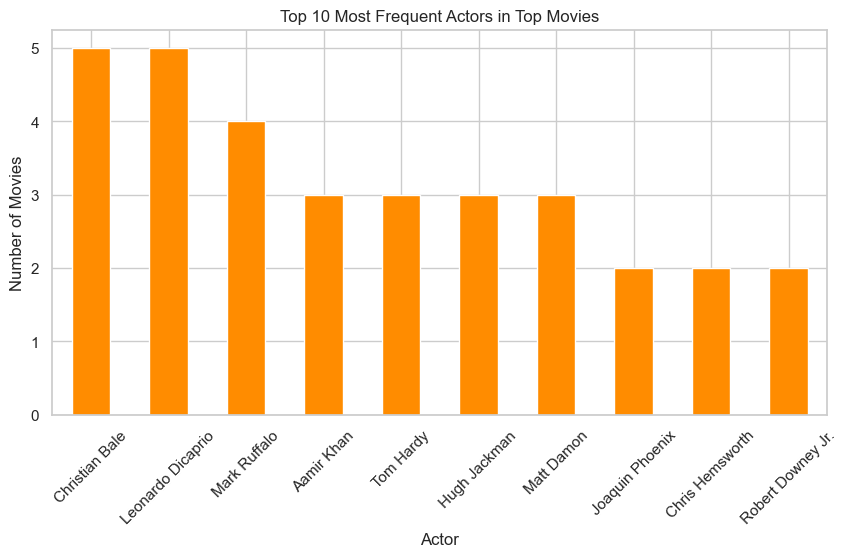

In [249]:
# Bar plot for most frequent actors
plt.figure(figsize=(10, 5))
actor_counts.plot(kind="bar", color="darkorange")
plt.title("Top 10 Most Frequent Actors in Top Movies")
plt.xlabel("Actor")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

In [250]:
"""
INSIGHTS:
Christian Bale & Leonardo DiCaprio Lead: Both appear in 5 movies, proving their consistent presence in high-rated films.

"""

'\nINSIGHTS:\nChristian Bale & Leonardo DiCaprio Lead: Both appear in 5 movies, proving their consistent presence in high-rated films.\n\n'

5- Trends in Number of Movies Directed by Top Directors

<Figure size 1200x600 with 0 Axes>

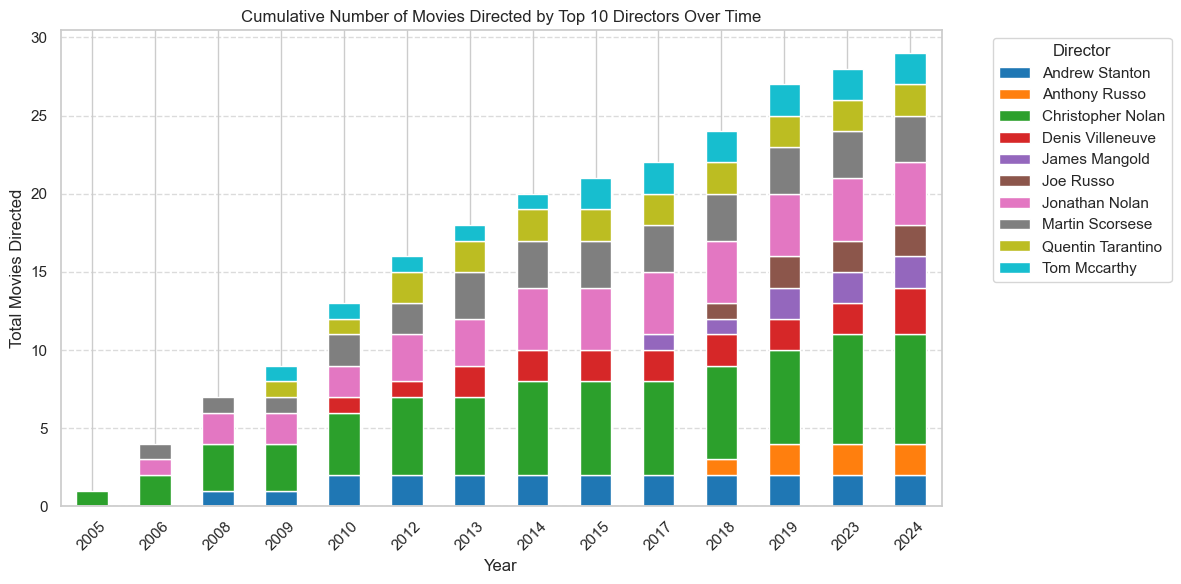

In [251]:
# Number of Movies Directed by Top 10 Directors Over Time

top_directors = df_exploded_directors["Director"].value_counts().head(10).index
df_top_directors = df_exploded_directors[df_exploded_directors["Director"].isin(top_directors)]

# Group by Year and Director to count movies directed per year
director_trends = df_top_directors.groupby(["Year", "Director"]).size().unstack().fillna(0)

# Convert to cumulative count to show trends over time
director_trends_cumulative = director_trends.cumsum()

# Plot a stacked bar chart for cumulative movies directed over time
plt.figure(figsize=(12, 6))
director_trends_cumulative.plot(kind="bar", stacked=True, colormap="tab10", figsize=(12, 6))

# Chart Titles and Labels
plt.title("Cumulative Number of Movies Directed by Top 10 Directors Over Time")
plt.xlabel("Year")
plt.ylabel("Total Movies Directed")
plt.legend(title="Director", bbox_to_anchor=(1.05, 1), loc='upper left')

# Formatting
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

In [252]:
"""
INSIGHTS: 
    Christopher Nolan Leads in Consistency
        His green section grows significantly over time, showing a steady output of high-rated films.
        Nolan remains one of the most influential directors across multiple years.

    Jonathan Nolan, Martin Scorsese, and Quentin Tarantino Maintain a Strong Presence
        Their cumulative contributions increase steadily, indicating long-term industry influence.
    
    The overall number of movies directed rises sharply after 2010, reflecting the growing importance of these directors in top-rated cinema.
    
    """

'\nINSIGHTS: \n    Christopher Nolan Leads in Consistency\n        His green section grows significantly over time, showing a steady output of high-rated films.\n        Nolan remains one of the most influential directors across multiple years.\n\n    Jonathan Nolan, Martin Scorsese, and Quentin Tarantino Maintain a Strong Presence\n        Their cumulative contributions increase steadily, indicating long-term industry influence.\n    \n    The overall number of movies directed rises sharply after 2010, reflecting the growing importance of these directors in top-rated cinema.\n    \n    '


=== Top 10 Directors by Average Box Office Revenue ===
Director
Anthony Russo        2.425927e+09
Joe Russo            2.425927e+09
Todd Phillips        1.078959e+09
Andrew Stanton       7.973599e+08
Jonathan Nolan       7.480437e+08
Christopher Nolan    7.403461e+08
Phil Lord            5.422136e+08
Sam Mendes           4.460644e+08
James Mangold        4.227400e+08
Tom Mccarthy         4.168962e+08
Name: Box Office Revenue, dtype: float64


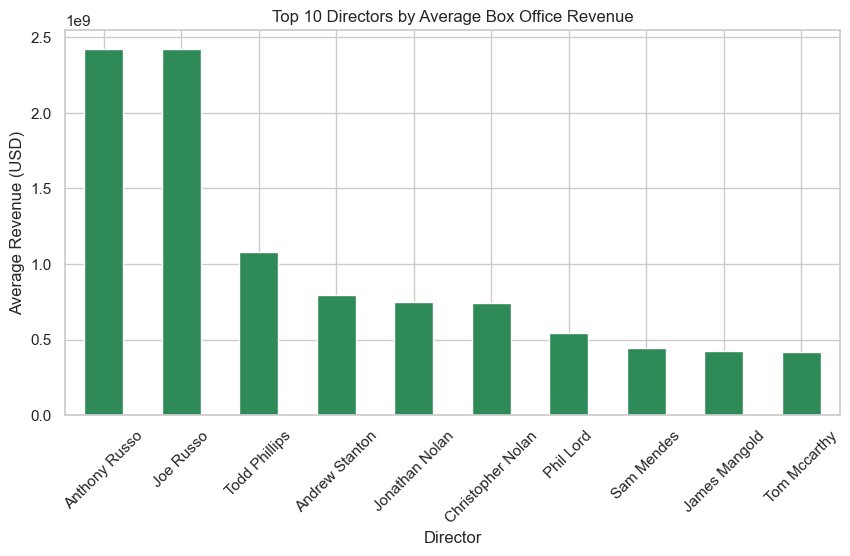

In [253]:
# Influence of Directors and Actors on Movie Success

# Compare average box office revenue for top directors
director_revenue = df_exploded_directors.groupby("Director")["Box Office Revenue"].mean().sort_values(ascending=False).head(10)
print("\n=== Top 10 Directors by Average Box Office Revenue ===")
print(director_revenue)

plt.figure(figsize=(10, 5))
director_revenue.plot(kind="bar", color="seagreen")
plt.title("Top 10 Directors by Average Box Office Revenue")
plt.xlabel("Director")
plt.ylabel("Average Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

In [254]:
"""
INSIGHTS:
    The Russo Brothers set the bar for high-grossing films.
   
"""

'\nINSIGHTS:\n    The Russo Brothers set the bar for high-grossing films.\n   \n'


=== Top 10 Actors by Average Box Office Revenue ===
Actor
Chris Evans             2.799439e+09
Robert Downey Jr.       2.425927e+09
Benedict Cumberbatch    1.952732e+09
Zendaya                 1.333688e+09
Mark Ruffalo            1.311379e+09
Chris Hemsworth         1.074704e+09
Tom Hanks               1.067316e+09
Emily Blunt             9.758113e+08
Timothée Chalamet       7.146444e+08
Christian Bale          5.670832e+08
Name: Box Office Revenue, dtype: float64


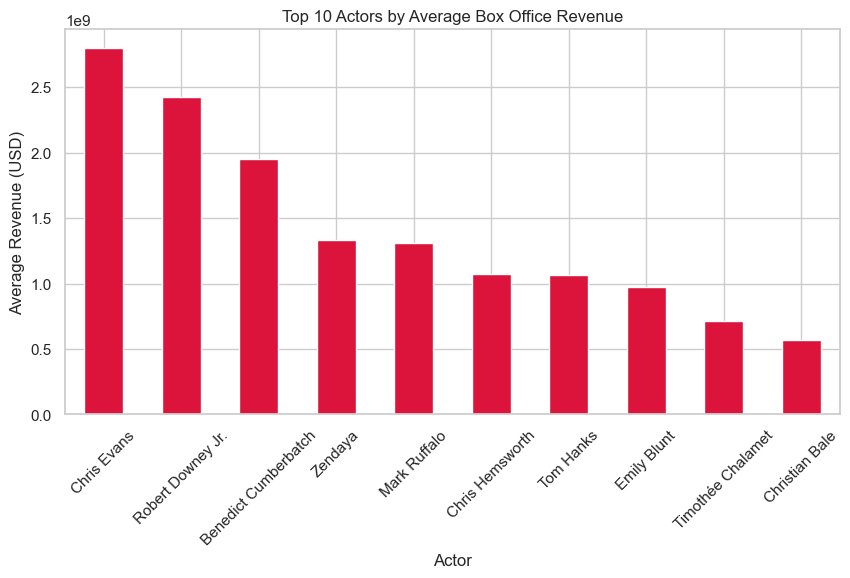

In [255]:
# Compare average box office revenue for top actors
actor_revenue = df_exploded_actors.groupby("Actor")["Box Office Revenue"].mean().sort_values(ascending=False).head(10)
print("\n=== Top 10 Actors by Average Box Office Revenue ===")
print(actor_revenue)

plt.figure(figsize=(10, 5))
actor_revenue.plot(kind="bar", color="crimson")
plt.title("Top 10 Actors by Average Box Office Revenue")
plt.xlabel("Actor")
plt.ylabel("Average Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

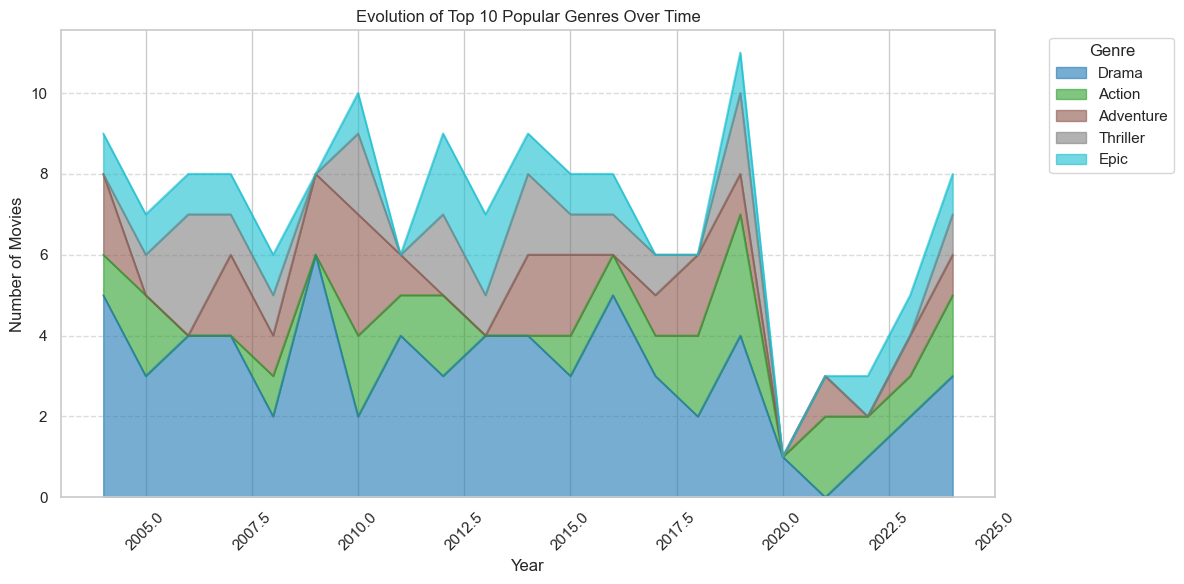

In [256]:
# Evolution of Film Styles (Genre Trends)

# Extracting most common genres over time
df_exploded_genres = df.assign(Genre=df["Genre"].str.split(",")).explode("Genre")
df_exploded_genres["Genre"] = df_exploded_genres["Genre"].str.strip()
genre_trends = df_exploded_genres.groupby(["Year", "Genre"]).size().unstack().fillna(0)

# Select top 5 genres across all years
top_genres = df_exploded_genres["Genre"].value_counts().head(5).index
genre_trends = genre_trends[top_genres]

# Plot stacked area chart for top 10 genres
plt.figure(figsize=(12, 6))
genre_trends.plot(kind='area', stacked=True, colormap='tab10', alpha=0.6, figsize=(12, 6))

# Chart Titles and Labels
plt.title("Evolution of Top 10 Popular Genres Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [257]:
"""
INSIGHTS: 
Consistent Popularity of Drama: Drama has consistently been a dominant genre over the years.
Rise of Action & Adventure: Action and Adventure movies have seen a steady increase, particularly post-2010.
Sharp Decline in 2020: There a sharp decline across all genres in 2020, likely from the COVID-19 pandemic having a major negative impact on motion picture productions and theatrical releases. 
Recovery Post-Pandemic (2021-2024): There are signs of a strong rebound in many genres post-2021. 
The sharp drop in 2020 distorts trendlines and makes long-term growth in the genres appear artificially volatile. 
The sharp rebound after 2020 exaggerates the increase in the number of movies.

"""

'\nINSIGHTS: \nConsistent Popularity of Drama: Drama has consistently been a dominant genre over the years.\nRise of Action & Adventure: Action and Adventure movies have seen a steady increase, particularly post-2010.\nSharp Decline in 2020: There a sharp decline across all genres in 2020, likely from the COVID-19 pandemic having a major negative impact on motion picture productions and theatrical releases. \nRecovery Post-Pandemic (2021-2024): There are signs of a strong rebound in many genres post-2021. \nThe sharp drop in 2020 distorts trendlines and makes long-term growth in the genres appear artificially volatile. \nThe sharp rebound after 2020 exaggerates the increase in the number of movies.\n\n'

6- Audieance Preferances

In [258]:
""" 
Since the dataset doesn't have direct columns for emerging technologies (e.g., Uses_CGI, IMAX_Release, 3D_Release), Alternative Approache has been taken, 
Using Genre Trends Over Time:
    If high-tech-heavy genres (e.g., Sci-Fi, Superhero, Action, Animation) have increased over time, this could indicate a greater use of CGI, IMAX, and 3D.
    We can analyze the proportion of these genres compared to traditional genres (e.g., Drama, Thriller)
Using Box Office Revenue as a Proxy
    Big-budget blockbuster movies (which often use CGI, IMAX, and 3D) tend to have higher revenues.
    We can check if higher-grossing movies are mostly from tech-heavy genres.

    """

" \nSince the dataset doesn't have direct columns for emerging technologies (e.g., Uses_CGI, IMAX_Release, 3D_Release), Alternative Approache has been taken, \nUsing Genre Trends Over Time:\n    If high-tech-heavy genres (e.g., Sci-Fi, Superhero, Action, Animation) have increased over time, this could indicate a greater use of CGI, IMAX, and 3D.\n    We can analyze the proportion of these genres compared to traditional genres (e.g., Drama, Thriller)\nUsing Box Office Revenue as a Proxy\n    Big-budget blockbuster movies (which often use CGI, IMAX, and 3D) tend to have higher revenues.\n    We can check if higher-grossing movies are mostly from tech-heavy genres.\n\n    "

In [259]:
# Identify Tech-Driven Movie Genres (assuming genres like Sci-Fi, Action, Fantasy, etc.)
tech_genres = ["Superhero", "Sci-Fi", "Fantasy", "Action", "Adventure", "Animation"]

# Filter dataset for only tech-driven genres
df_tech_movies = df_exploded_genres[df_exploded_genres["Genre"].isin(tech_genres)]

# Group by year and count tech-driven movies
tech_movie_counts = df_tech_movies.groupby("Year").size()

# Get total movies per year
total_movie_counts = df_exploded_genres.groupby("Year").size()

# Compute percentage of Tech-Driven Movies
df_tech_trends = (tech_movie_counts / total_movie_counts * 100).reset_index()
df_tech_trends.columns = ["Year", "Tech-Driven Movies (%)"]


In [260]:
# Compute average box office revenue for tech-driven movies per year
avg_revenue = df_tech_movies.groupby("Year")["Box Office Revenue"].mean().reset_index()
avg_revenue.columns = ["Year", "Avg Box Office Revenue (Billion $)"]

# Merge the data
df_tech_trends = df_tech_trends.merge(avg_revenue, on="Year", how="left")
df_tech_trends["Avg Box Office Revenue (Billion $)"] /= 1e9  # Convert to billions

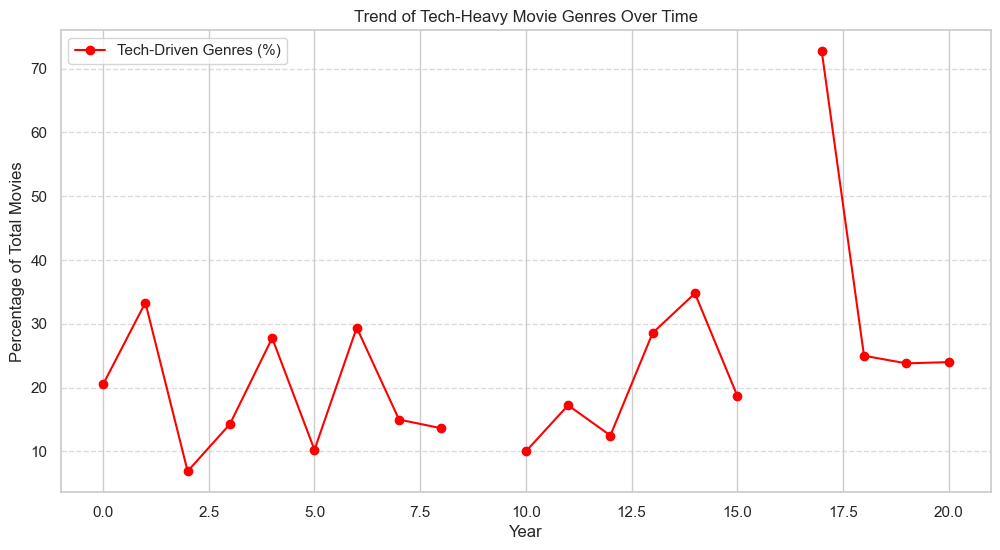

In [261]:
# Plot trend of tech-driven genres over time
plt.figure(figsize=(12, 6))
df_tech_trends["Tech-Driven Movies (%)"].plot(marker='o', linestyle='-', color="red", label="Tech-Driven Genres (%)")
plt.title("Trend of Tech-Heavy Movie Genres Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage of Total Movies")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

C:\Users\Bihani\AppData\Local\Temp\ipykernel_2960\2885312467.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Genre", y="Box Office Revenue", data=df_revenue_tech, palette="coolwarm")


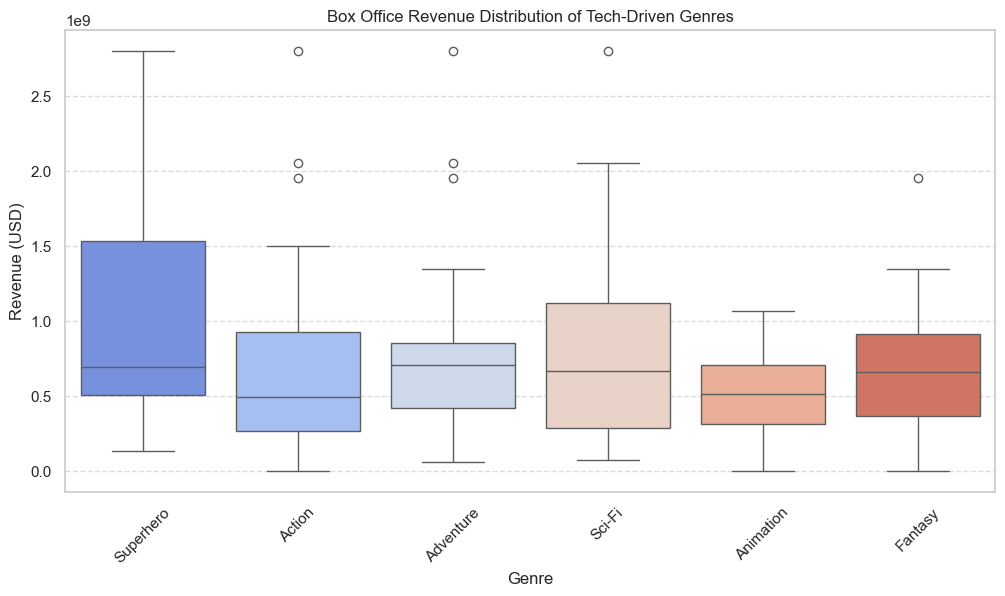

In [262]:
# Check Revenue of Tech-Driven Movies

# Merge revenue data with genre-exploded dataset
df_revenue_tech = df_exploded_genres[df_exploded_genres["Genre"].isin(tech_genres)]

# Box plot of revenue by tech-heavy genres
plt.figure(figsize=(12, 6))
sns.boxplot(x="Genre", y="Box Office Revenue", data=df_revenue_tech, palette="coolwarm")
plt.title("Box Office Revenue Distribution of Tech-Driven Genres")
plt.xticks(rotation=45)
plt.ylabel("Revenue (USD)")
plt.xlabel("Genre")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

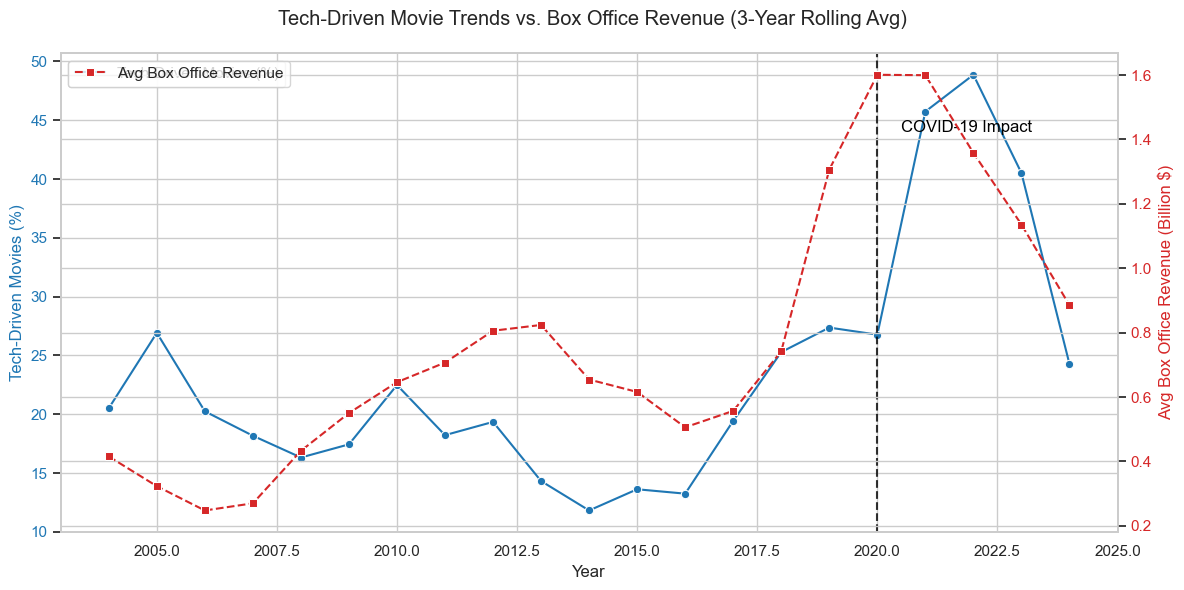

In [263]:
# Apply a 3-year rolling average for smoothing
df_tech_trends_smoothed = df_tech_trends.set_index("Year").rolling(window=3, min_periods=1).mean().reset_index()

# Create dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Percentage of Tech-Driven Movies (Left Y-Axis)
ax1.set_xlabel("Year")
ax1.set_ylabel("Tech-Driven Movies (%)", color="tab:blue")
sns.lineplot(data=df_tech_trends_smoothed, x="Year", y="Tech-Driven Movies (%)", marker="o", color="tab:blue", label="Tech-Driven Movies (%)", ax=ax1)
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create second Y-Axis (Right)
ax2 = ax1.twinx()
ax2.set_ylabel("Avg Box Office Revenue (Billion $)", color="tab:red")
sns.lineplot(data=df_tech_trends_smoothed, x="Year", y="Avg Box Office Revenue (Billion $)", marker="s", color="tab:red", linestyle="dashed", label="Avg Box Office Revenue", ax=ax2)
ax2.tick_params(axis="y", labelcolor="tab:red")

# Annotate 2020 as an outlier
ax1.axvline(x=2020, color="black", linestyle="--", alpha=0.8)
ax1.text(2020.5, df_tech_trends_smoothed["Tech-Driven Movies (%)"].max() * 0.9, "COVID-19 Impact", color="black")

# Titles & Legends
fig.suptitle("Tech-Driven Movie Trends vs. Box Office Revenue (3-Year Rolling Avg)")
fig.tight_layout()
plt.show()

In [264]:
"""
Insights: Tech-Driven Movie Trends vs. Box Office Revenue 

    Superhero & Sci-Fi dominated revenue from 2010-2019 but are now stabilizing.
    Tech-heavy genres still lead, but their box office dominance is declining post-pandemic.
    Newer movie technologies (IMAX, 3D) boosted revenue in the 2010s but may not be enough today.
    Streaming & evolving audience tastes could be reshaping the industry post-2021.

"""

'\nInsights: Tech-Driven Movie Trends vs. Box Office Revenue \n\n    Superhero & Sci-Fi dominated revenue from 2010-2019 but are now stabilizing.\n    Tech-heavy genres still lead, but their box office dominance is declining post-pandemic.\n    Newer movie technologies (IMAX, 3D) boosted revenue in the 2010s but may not be enough today.\n    Streaming & evolving audience tastes could be reshaping the industry post-2021.\n\n'

7- Correlations and Discoveries:


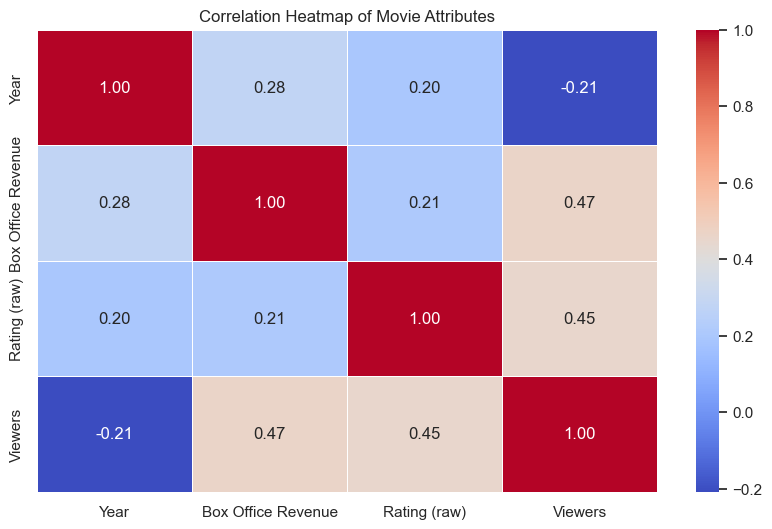

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

#  Correlation Heatmap to identify strong relationships among numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Movie Attributes")
plt.show()

In [266]:
"""
INSIGHT:
    Viewer engagement has a greater impact on revenue than ratings.
    Box office earnings have risen over time, but audience sizes have slightly declined.
    Highly-rated movies tend to have more viewers, but high ratings alone do not guarantee financial success.
    Streaming and digital platforms may be influencing the way people consume movies over the years.
"""

'\nINSIGHT:\n    Viewer engagement has a greater impact on revenue than ratings.\n    Box office earnings have risen over time, but audience sizes have slightly declined.\n    Highly-rated movies tend to have more viewers, but high ratings alone do not guarantee financial success.\n    Streaming and digital platforms may be influencing the way people consume movies over the years.\n'

In [267]:
# Regression Analysis to determine whether high IMDb ratings lead to higher revenue
X = df["Rating (raw)"]
y = df["Box Office Revenue"]

# Add constant for regression model
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Display regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Box Office Revenue   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     3.640
Date:                Fri, 21 Mar 2025   Prob (F-statistic):             0.0599
Time:                        19:19:50   Log-Likelihood:                -1779.3
No. Observations:                  83   AIC:                             3563.
Df Residuals:                      81   BIC:                             3567.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.196e+09   2.41e+09     -1.744   

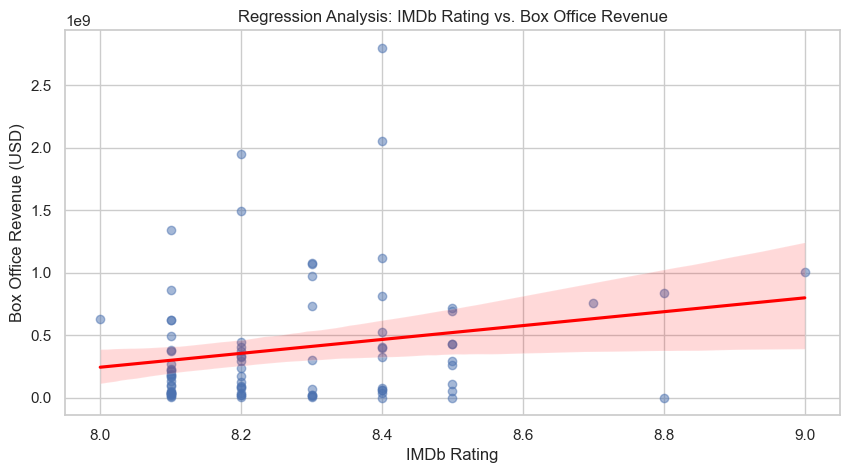

In [268]:
# Scatter plot with regression line
plt.figure(figsize=(10, 5))
sns.regplot(x=df["Rating (raw)"], y=df["Box Office Revenue"], scatter_kws={"alpha":0.5}, line_kws={"color": "red"})
plt.title("Regression Analysis: IMDb Rating vs. Box Office Revenue")
plt.xlabel("IMDb Rating")
plt.ylabel("Box Office Revenue (USD)")
plt.grid(True)
plt.show()

In [269]:
"""
INSIGHT: 
    IMDb ratings alone are NOT strong predictors of box office success.
    The model suggests a weak positive effect, but it is not statistically significant (p = 0.06).
    High revenue movies are driven by multiple factors beyond just critical ratings.
"""

'\nINSIGHT: \n    IMDb ratings alone are NOT strong predictors of box office success.\n    The model suggests a weak positive effect, but it is not statistically significant (p = 0.06).\n    High revenue movies are driven by multiple factors beyond just critical ratings.\n'